In [22]:
import pandas as pd
#1Obtengo los datos del dataset
data=pd.read_csv('dataset/german.csv',sep=';')
 #Determino aver si tengo datos nulos
print(data.info())



# Obtiene un diccionario de los tipos de datos de las columnas y lo imprime
dtypes = data.dtypes.to_dict()
print("Tipos de datos: ", dtypes)
#por lo que vi son todos enteros. Procedo al siguiente paso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [23]:

#Esto es un paso de la preparacion de los datos
X=data.drop('Creditability',axis=1)
Y=data['Creditability']

#Printeo los valores de X y Y
print(X)
print(Y)


In [24]:
#2.1 Ahora separo los datos de entrenamiento y los datos de prueba
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)




array([[<Axes: title={'center': 'Account_Balance'}>,
        <Axes: title={'center': 'Duration_of_Credit_monthly'}>,
        <Axes: title={'center': 'Payment_Status_of_Previous_Credit'}>,
        <Axes: title={'center': 'Purpose'}>,
        <Axes: title={'center': 'Credit_Amount'}>],
       [<Axes: title={'center': 'Value_Savings_Stocks'}>,
        <Axes: title={'center': 'Length_of_current_employment'}>,
        <Axes: title={'center': 'Instalment_per_cent'}>,
        <Axes: title={'center': 'Sex_Marital_Status'}>,
        <Axes: title={'center': 'Guarantors'}>],
       [<Axes: title={'center': 'Duration_in_Current_address'}>,
        <Axes: title={'center': 'Most_valuable_available_asset'}>,
        <Axes: title={'center': 'Age_years'}>,
        <Axes: title={'center': 'Concurrent_Credits'}>,
        <Axes: title={'center': 'Type_of_apartment'}>],
       [<Axes: title={'center': 'No_of_Credits_at_this_Bank'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'cen

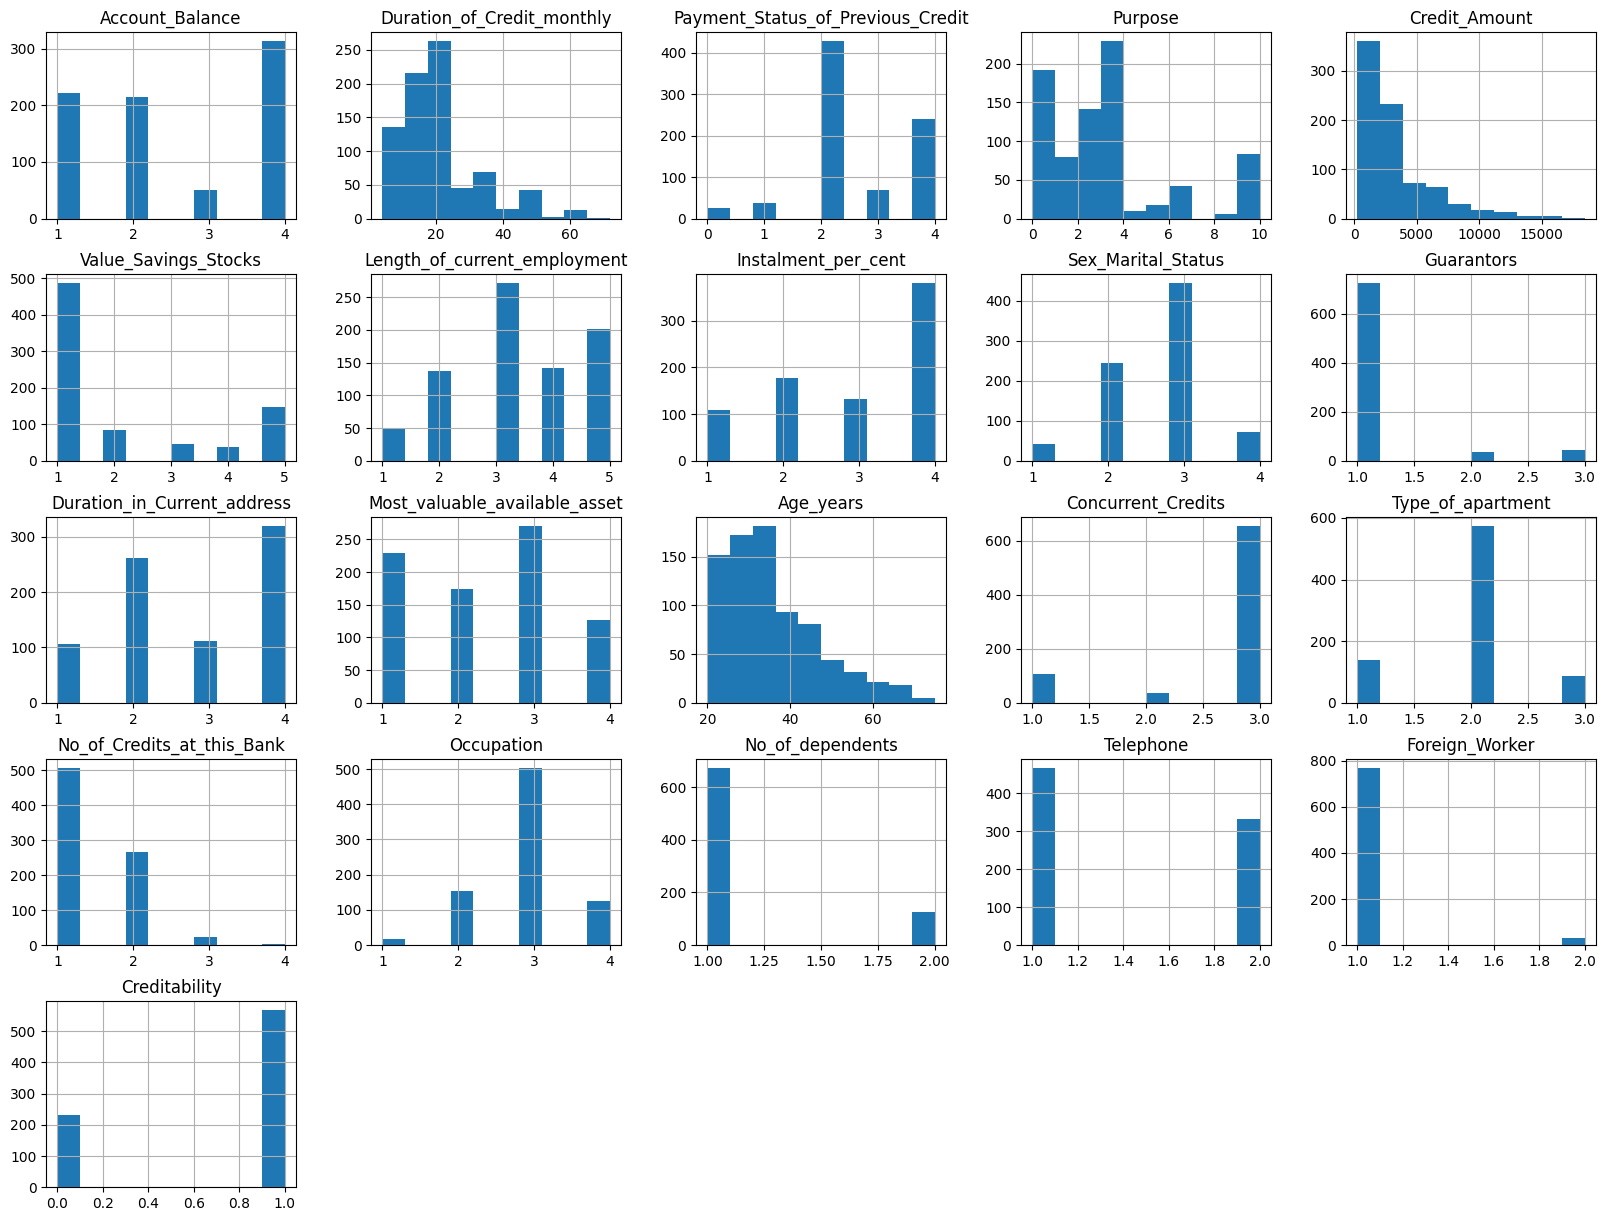

In [4]:
#3 Seguimos con la exploracion de los datos
#uno las columnas de x_train y y_train para poder hacer un grafico de barras, con join

train_data= x_train.join(y_train)
#print(train_data)

#grafico de barras
train_data.hist(figsize=(20,15))
 

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns 
#en orden de importancia de mayor a menor
corr=train_data.corr()
print(corr["Creditability"].sort_values(ascending=False))
#seguimos con la exploracion de los datos, realizo un heat map para ver la correlacion entre las variables
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)


ModuleNotFoundError: No module named 'seaborn'

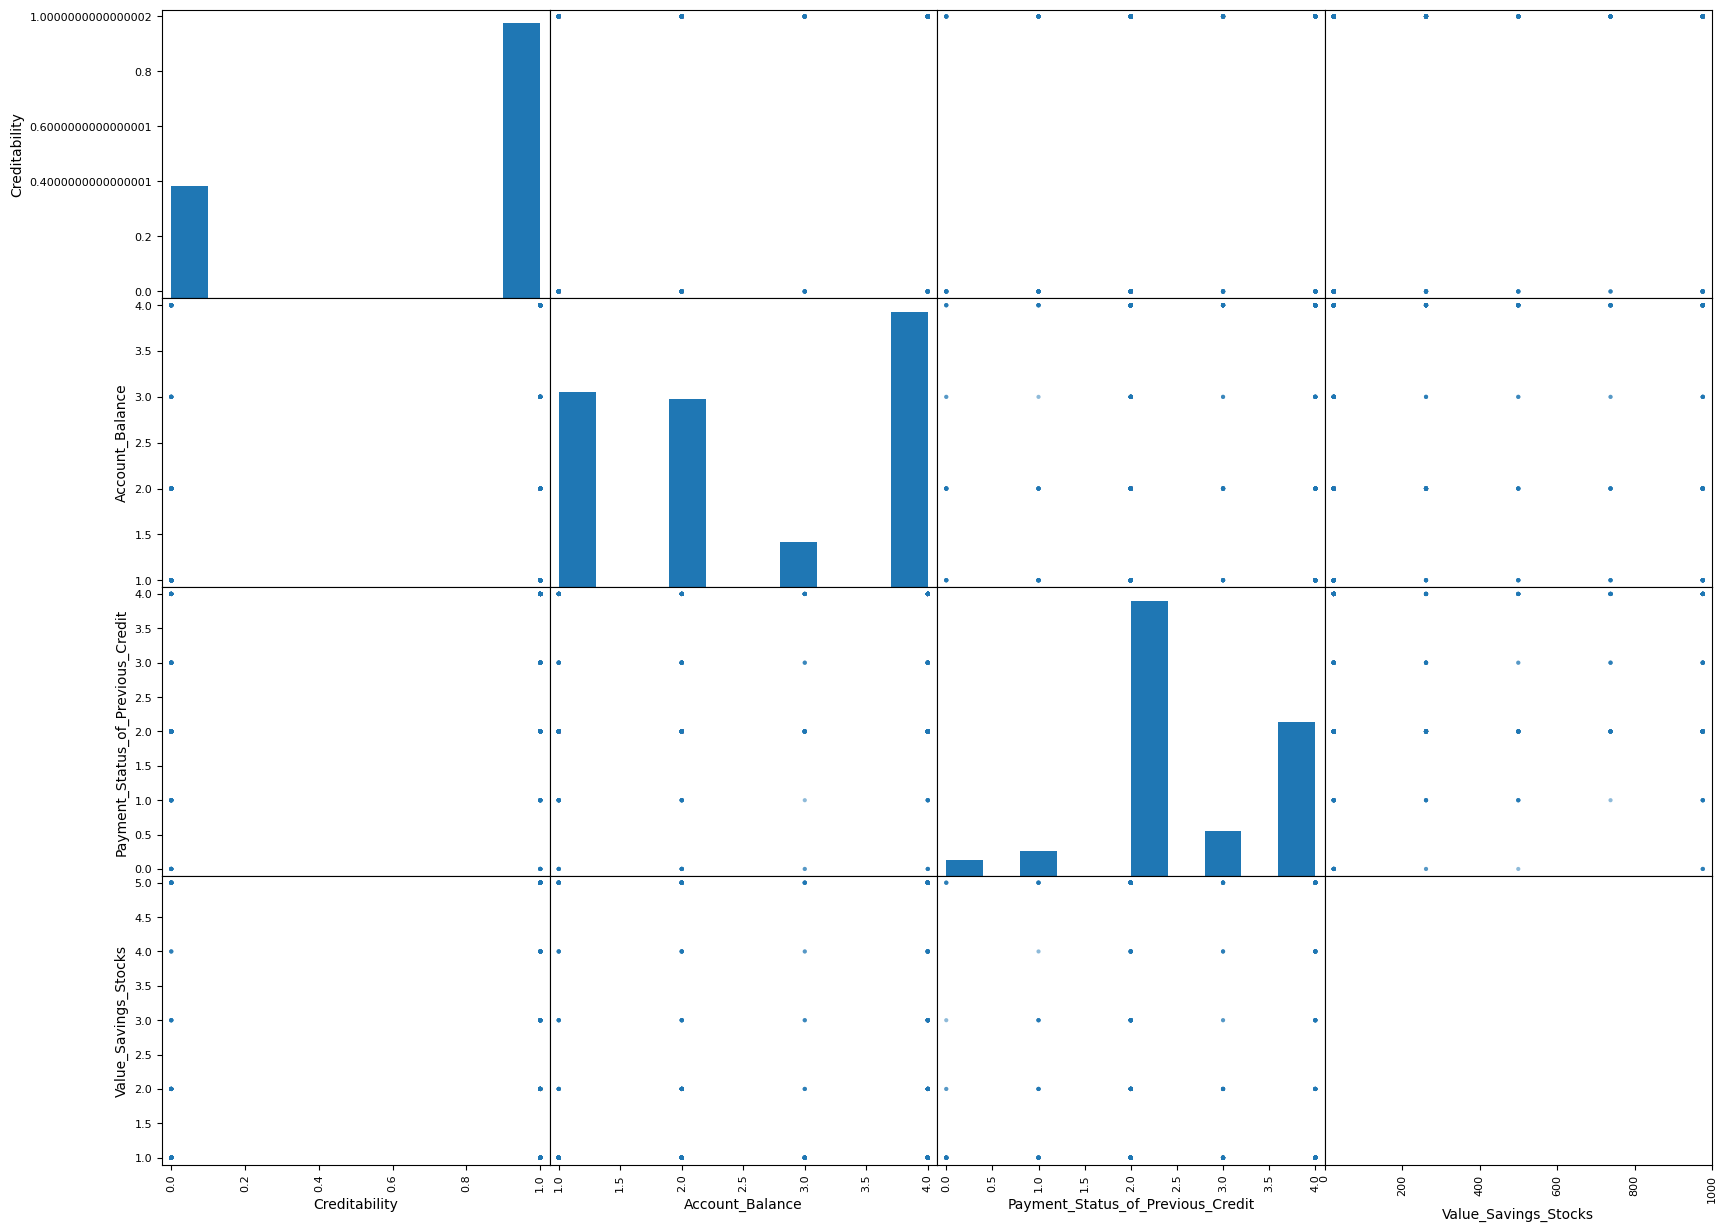

In [11]:
#Vamos a realizar una matriz scatter para ver la relacion entre las variables
from pandas.plotting import scatter_matrix
#seteo los atributos con mas correlacion que vimos arriba
attributes=['Creditability','Account_Balance','Payment_Status_of_Previous_Credit','Value_Savings_Stocks']
scatter_matrix(train_data[attributes], figsize=(20, 15))

# Ajusta los límites de los ejes
plt.xlim(0, 1000)
plt.ylim(-2, 4)

plt.show()

#Revisar pq dio tan guanaco este grafico

In [191]:
#En caso de encontrar alguna relacion entre variables, puedo usar onehot encoder para transformar las variables 
# categoricas en variables numericas y determinar algo que suponga de otra columna


In [192]:
#Ahora comenzamos con la preparacion de los datos
#el primer paso es separar x e y pero ya lo hice arriba


In [12]:
#Limpieza de datos
#Por lo que estuve v iendo, son todos numericos y no hay nulos
#por las dudas elimino los faltantes



data=data.dropna()
#Veo si hay nulos
print(data.isnull().sum())

#en caso de que hayan celdas vacias, puedo usar imputter para rellenarlas
#en caso de querer convertir una variable categorica a numerica, puedo usar 
# onehot encoder, labelencoder, ordinalencoder
#en este caso son todas numericas






Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64


In [13]:
#Tratamiento de valores faltantes
from sklearn.impute import SimpleImputer

# Creamos un objeto Imputer con la estrategia de imputación que deseamos
imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a un conjunto de datos
X_imputed = imputer.fit_transform(X)


In [14]:
#Normailzacion y estandarizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creamos un objeto scaler para normalizar los datos
scaler = MinMaxScaler()

# Aplicamos la normalización a un conjunto de datos
X_normalized = scaler.fit_transform(X)

# Creamos un objeto scaler para estandarizar los datos
scaler = StandardScaler()

# Aplicamos la estandarización a un conjunto de datos
X_standardized = scaler.fit_transform(X)


In [15]:

#Codificacion de variables categoricas
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Creamos un objeto encoder para codificar las características categóricas mediante one-hot encoding
encoder = OneHotEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

# Creamos un objeto encoder para codificar las características categóricas mediante encoding ordinal
encoder = OrdinalEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)


In [16]:
#Selección de características
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Creamos un objeto PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=2)

# Aplicamos PCA a un conjunto de datos
X_pca = pca.fit_transform(X)

# Creamos un objeto SelectKBest para seleccionar las k mejores características mediante f-regression
kbest = SelectKBest(score_func=f_regression, k=3)

# Aplicamos SelectKBest a un conjunto de datos
X_kbest = kbest.fit_transform(X, Y)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score

# Vamos a setear la variable de clasificacion
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

pipeline = make_pipeline(
    StandardScaler(),    
    SGDClassifier(),
)

# Entrenamos el modelo con los datos de entrenamiento
pipeline.fit(x_train, y_train_1)

# Ahora vamos a predecir con los datos de prueba
y_test_pred = pipeline.predict(x_test)

# Medimos el accuracy con cross value (podria ser con prueba y entrenamiento pero es menos preciso)
crossAccuracy = cross_val_score(pipeline, x_train, y_train_1, cv=3, scoring='accuracy')
print("SGD: ",crossAccuracy)





SGD:  [0.70411985 0.6741573  0.69924812]


In [ ]:
#Vamos a probar con un modelo de Random Firest
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier(n_estimators=100)

X=model.fit(x_train,y_train_1)
y_test_pred2=model.predict(x_test)
randomacc=cross_val_score(model,x_train,y_train_1,cv=3,scoring='accuracy')
print("Random Forest: ",randomacc)


Random Forest:  [0.7752809  0.74157303 0.78947368]


In [ ]:
#El accuracy es bastante bajo asique voy a definir hiperparametros y ver si mejora
#usare gridsearch para encontrar los mejores hiperparametros
from sklearn.model_selection import GridSearchCV
param_grid={
       'alpha': [0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 5000],
    'tol': [0.0001, 0.001]
    
}

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(SGDClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(x_train,y_train_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo
best_model=SGDClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(x_train, y_train_1)
accuracy=cross_val_score(best_pipeline,x_train,y_train_1,cv=3,scoring='accuracy')
print("SGD con hiperparametros: ",accuracy)


#El resultado mejoro bastante, llego a 0,77 de accuracy

SGD con hiperparametros:  [0.75280899 0.73782772 0.77443609]


In [ ]:
#Pruebo el mismo paso de arriba pero con random forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(RandomForestClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(x_train,y_train_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo
best_model=RandomForestClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(x_train, y_train_1)
accuracy=cross_val_score(best_pipeline,x_train,y_train_1,cv=3,scoring='accuracy')
print("RandomForest con hiperparametros: ",accuracy)


RandomForest con hiperparametros:  [0.79400749 0.72659176 0.77443609]


In [ ]:
#Implementar Dummy classifier
from sklearn.dummy import DummyClassifier

Most_frequent = DummyClassifier(strategy='most_frequent')
accuracy=cross_val_score(Most_frequent,x_train,y_train_1,cv=3,scoring='accuracy')
print("Dummy classifier: ",accuracy)

Dummy classifier:  [0.71161049 0.70786517 0.71052632]


In [ ]:
#Generamos una matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(SGDClassifier(),x_train,y_train_1,cv=3)
confusion_matrix(y_train_1,y_pred)

array([[100, 132],
       [218, 350]])

In [ ]:
#Impleentamos la Precision y recall
from sklearn.metrics import precision_score, recall_score

#calculo la precision
print("Precision: ",precision_score(y_train_1,y_pred))

#calculo el recall
print("Recall: ",recall_score(y_train_1,y_pred))

Precision:  0.7261410788381742
Recall:  0.6161971830985915


In [ ]:
#Implementamos f1 score
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_1,y_pred))

F1 Score: 0.6666666666666665


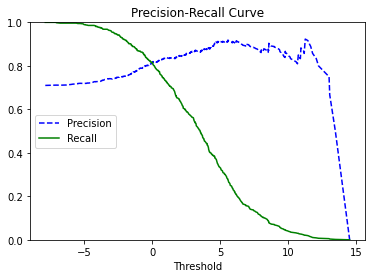

In [ ]:
#Implementamos trade off de recall y precision
#precision/recall trade off curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc
import numpy as np

# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

# Entrenar el clasificador SGD con el conjunto de entrenamiento escalado
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_1)

# Obtener las puntuaciones de decisión del clasificador en lugar de las predicciones
y_scores = sgd_clf.decision_function(X_train_scaled)

# Calcular la precisión, sensibilidad (recall) y umbrales para la curva de Precisión-Recall
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

# Crear un gráfico para visualizar la curva de Precisión-Recall
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")  # Trazar la precisión en función del umbral
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")  # Trazar la sensibilidad (recall) en función del umbral
plt.xlabel("Threshold")  # Etiqueta del eje x
plt.legend(loc="center left")  # Posición de la leyenda en el gráfico
plt.ylim([0, 1])  # Límites del eje y
plt.title("Precision-Recall Curve")  # Título del gráfico
plt.show()  # Mostrar el gráfico

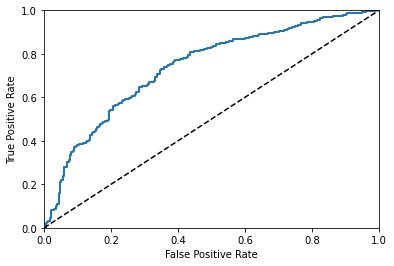

In [ ]:
#Implementamos ROC curve
from sklearn.metrics import roc_curve

# Calcular la tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr) y umbrales para la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Graficar la línea diagonal que representa un clasificador aleatorio
    plt.axis([0, 1, 0, 1])  # Configurar los límites de los ejes x e y
    plt.xlabel('False Positive Rate')  # Etiqueta del eje x
    plt.ylabel('True Positive Rate')  # Etiqueta del eje y

# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

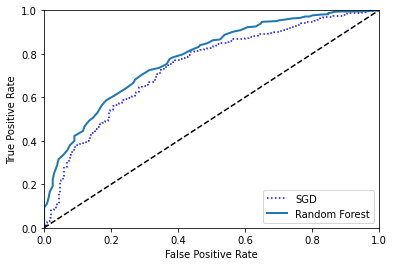

In [ ]:
#comparar modelos con curva roc
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]

# Calcular la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)

# Graficar la curva ROC para compararla con la del modelo SGDClassifier
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#multiclase clasificacion con OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
ovr_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(x_train,y_train)

#caso de multiclase con sdgcclassifier, no necesitamos las funciones anteriores
#ya que el clasificador lo hace por defecto
sgd_clf.fit(x_train,y_train)
cross_val_predict(sgd_clf,x_train,y_train,cv=3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Analizamos el error
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[ 78, 154],
       [189, 379]])

Confusion matrix:
[[ 40  28]
 [ 26 106]]


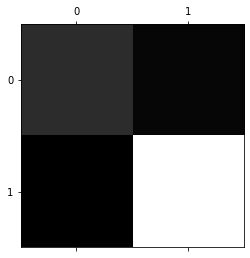

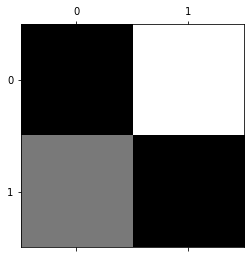

In [ ]:
#analisis del error con graficos ,Revisar
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Obtener la matriz de confusión
conf_mx = confusion_matrix(y_test, y_test_pred)
print(f'Confusion matrix:\n{conf_mx}')

# Mostrar la matriz de confusión como una imagen
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Calcular la tasa de error por clase
# Calcular la suma de las filas de la matriz de confusión y mantener las dimensiones
row_sums = conf_mx.sum(axis=1, keepdims=True)

# Dividir cada elemento de la matriz de confusión por la suma de su fila
norm_conf_mx = conf_mx / row_sums

# Rellenar la diagonal con ceros para que no se muestre en el gráfico
np.fill_diagonal(norm_conf_mx, 0)

# Mostrar la matriz normalizada como una imagen en escala de grises
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
